In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf

2022-09-09 02:51:23.075299: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-09 02:51:23.075319: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
dataset = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
(train_x, train_y), (test_x, test_y) = dataset
trains_by_y = [[], [], [], [], [], [], [], [], [], []]

In [5]:
import numpy as np
from sklearn.manifold import TSNE
tsne_reducer = TSNE()
np_train_x = np.array(train_x)
print(np_train_x.shape)
reordered = np_train_x.reshape((60000,-1))
print(reordered.shape)
train_x_2d = tsne_reducer.fit_transform(np.array(reordered))

(60000, 28, 28)
(60000, 784)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [6]:
for index in range(len(train_y)):
    y_val = train_y[index]
    trains_by_y[y_val].append(train_x_2d[index])
# print(trains_by_y[0])

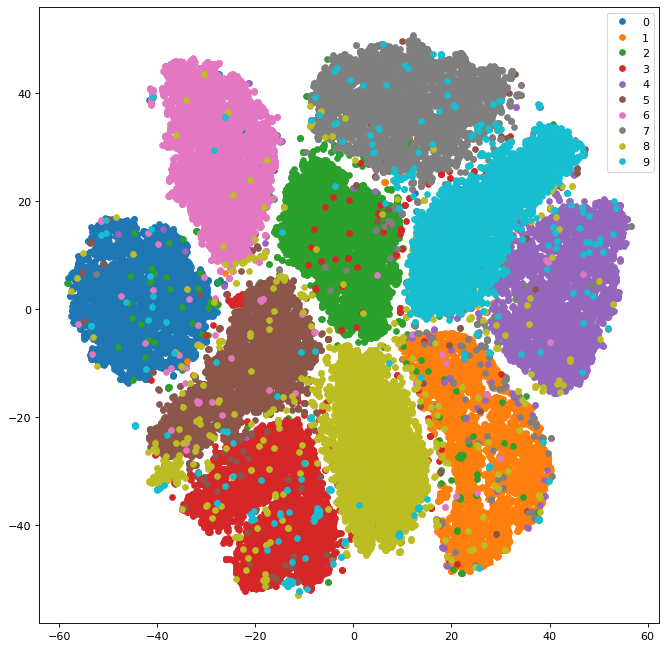

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
for i in range(len(trains_by_y)):
    data = trains_by_y[i]
    plt.plot(np.array(data)[:,0], np.array(data)[:,1], '.', markersize=10, label=str(i))
plt.legend()

In [ ]:
from pathlib import Path  # For defining dataset Paths
import sys                # For include librep package

# This must be done if librep is not installed via pip,
# as this directory (examples) is appart from librep package root
sys.path.append("..")

# Third party imports
import pandas as pd
import numpy as np

# Librep imports
from librep.utils.dataset import PandasDatasetsIO          # For quick load train, test and validation CSVs
from librep.datasets.multimodal import PandasMultiModalDataset # Wrap CSVs to librep's `Dataset` interface

In [ ]:
# Path for KuHar balanced view with the same activities (and labels numbers) as MotionSense
# It is assumed that the directory will contain (train.csv, test.csv and validation.csv)
kuhar_dataset_path = Path("../data/views/KuHar/balanced_motionsense_equivalent_view")

# Path for Motionsese balanced view
motionsense_dataset_path = Path("../data/views/MotionSense/balanced_view")